# Principal Component Analysis (PCA) is a dimensionality reduction technique used in machine learning and data analysis. It helps simplify a dataset while preserving its most important features.

Why Use PCA?

Reduce Complexity: Large datasets with many features can be difficult to process. PCA helps reduce the number of features while keeping the essential information.

Remove Redundancy: If features are correlated, PCA combines them into a smaller set of independent features.

Improve Model Performance: Fewer features can speed up training and sometimes even improve accuracy by reducing overfitting.

Visualization: PCA can reduce data to 2D or 3D, making it easier to visualize patterns.

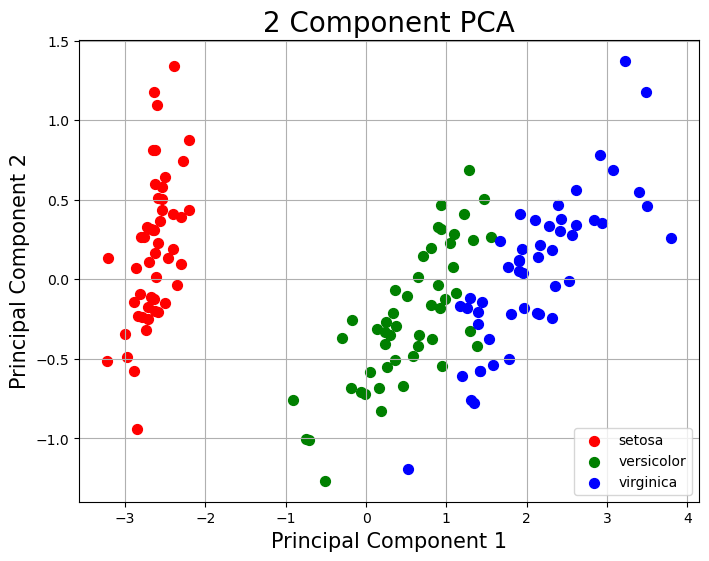

Explained variance ratio: [0.92461872 0.05306648]


In [3]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Apply PCA with 2 components
pca = PCA(n_components=2)
#Fit the model to the data (learn the parameters/statistics from the data).
#Transform the data based on the learned parameters.
principalComponents = pca.fit_transform(df)

# Create a new DataFrame with the principal components
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

# Concatenate the DataFrame with the class labels
finalDf = pd.concat([principalDf, pd.DataFrame(data=iris.target, columns=['target'])], axis=1)

# Visualize the data
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 Component PCA', fontsize=20)

targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'], finalDf.loc[indicesToKeep, 'principal component 2'], c=color, s=50)

ax.legend(iris.target_names)
ax.grid()
plt.show()

# Print explained variance ratio
print('Explained variance ratio:', pca.explained_variance_ratio_)